<a href="https://colab.research.google.com/github/AnshulSingh-eZ/Machine_Learning_Lab_23CS067/blob/main/Exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from ucimlrepo import fetch_ucirepo
iris = fetch_ucirepo(id=53) # Iris dataset id = 53
df = pd.DataFrame(iris.data.features)
df['species'] = iris.data.targets

## **EDA**

In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


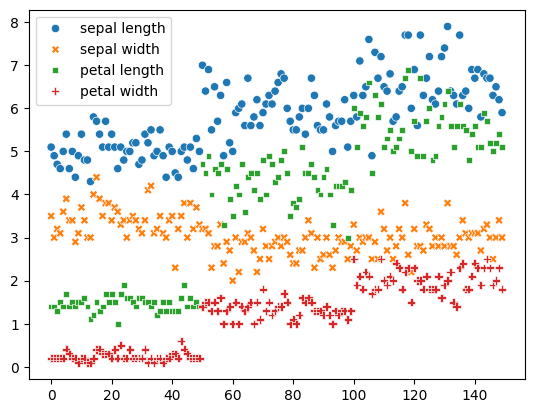

In [7]:
sns.scatterplot(df)
plt.show()

In [8]:
df['species'] = df['species'].str.lower()

A lot of different combinations could be plotted, petal length vs petal width provides clear distinguishable feature of all the flowers.

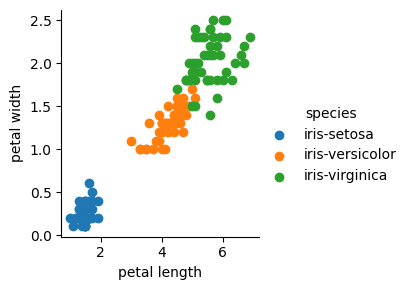

In [9]:
sns.FacetGrid(df, hue='species').map(plt.scatter, 'petal length', 'petal width').add_legend()

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
species,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [22]:
X = df.drop('species', axis = 1)
y = df['species']
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=None)

Since our data is preprocessed and is ready, we are now building KNN classifier!!

In [24]:
def euclidian_dist(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [25]:
class knn(object):
  def __init__(self, k=3):
    self.k = k

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    predictions=[]
    for x in X_test:
      prediction = self.__predict__(x)
      predictions.append(prediction)
    return predictions

  def __predict__(self, x):
    distances = []
    for x_train in self.X_train:
      distance = euclidian_dist(x, x_train)
      distances.append(distance)
    k_index = np.argsort(distances)[:self.k]
    k_labels = []
    for i in k_index:
      k_labels.append(self.y_train[i])
    mode = max(set(k_labels), key = k_labels.count)
    return mode


# As K (number of clusters) increases, accuracy decreases.

In [49]:
def helper(z):
  model = knn(z)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  n = len(predictions)
  correct = 0
  for i in range(n):
    if predictions[i] == y_test[i]:
      correct+=1
  return correct/n

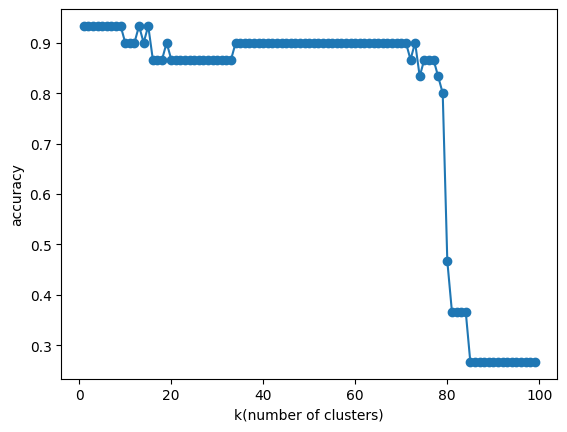

In [50]:
accuracy = []
for z in range(1,100):
  acc = helper(z)
  accuracy.append(acc)
plt.plot(range(1,100), accuracy, marker='o')
plt.xlabel("k(number of clusters)")
plt.ylabel("accuracy")
plt.show()

In [47]:
mxacc = max(accuracy)
best_k = accuracy.index(mxacc)+1

In [51]:
acc = helper(best_k)
print("Accuracy :", acc)

Accuracy : 0.9333333333333333
